## 将通过Glove 训练得到的词向量（Linux下通过C编译得到），利用word2vec加载使用

### 通过文件转化来将glove 的词向量加载到word2vec

In [1]:
from gensim.test.utils import datapath, get_tmpfile  # 载入文件
from gensim.models import KeyedVectors   
from gensim.scripts.glove2word2vec import glove2word2vec  # 将glove的词向量专户为word2vec的词向量

D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### 载入文件

In [4]:
# 载入文件 "vectors.txt"即为通过glove 训练得到的词向量文件
glove_file = datapath('vectors.txt')
tmp_file = get_tmpfile("test_word2vec.txt")   #转化为word2vec的词向量文件

#### 加载模型

In [8]:
a = glove2word2vec(glove_file, tmp_file)  # 返回词向量表的大小（voc_size,dimension_size）--> (71291, 50)
model = KeyedVectors.load_word2vec_format(tmp_file)
a                         # 

(71291, 50)

#### 测试模型

In [7]:
word_list = ["one","by"]
for word in word_list:
    print(word,"-"*10)
    for i in model.most_similar(word,topn=10):
        print(i[0],i[1])

one ----------
seven 0.9769717454910278
eight 0.9743722677230835
six 0.9699007272720337
nine 0.9620108008384705
four 0.9585620164871216
five 0.9527633190155029
three 0.9463174343109131
two 0.9200766086578369
zero 0.8949599266052246
in 0.7904540300369263
by ----------
been 0.8042818903923035
being 0.7942789793014526
as 0.7938838005065918
both 0.7762472629547119
which 0.775858998298645
also 0.7736897468566895
was 0.7729533910751343
be 0.7716822624206543
and 0.7663788795471191
the 0.7608302235603333


### 通过直接修改词向量文件加载

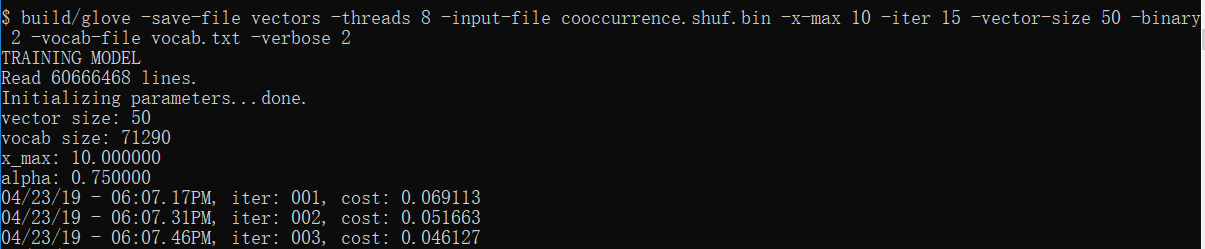

In [12]:
import gensimim

# 通过在"vectors.txt"的行首添加词向量的大小（voc_size,dimension_size）--> (71291, 50)得到"vectors01.txt"，然后直接加载
# （voc_size,dimension_size）的值在训练中会显示出
model = gensim.models.KeyedVectors.load_word2vec_format("vectors01.txt",binary=False)


In [13]:
word_list = ["one","by"]
for word in word_list:
    print(word,"-"*10)
    for i in model.most_similar(word,topn=10):
        print(i[0],i[1])

one ----------
seven 0.9769717454910278
eight 0.9743722677230835
six 0.9699007272720337
nine 0.9620108008384705
four 0.9585620164871216
five 0.9527633190155029
three 0.9463174343109131
two 0.9200766086578369
zero 0.8949599266052246
in 0.7904540300369263
by ----------
been 0.8042818903923035
being 0.7942789793014526
as 0.7938838005065918
both 0.7762472629547119
which 0.775858998298645
also 0.7736897468566895
was 0.7729533910751343
be 0.7716822624206543
and 0.7663788795471191
the 0.7608302235603333
